<p>
<img src="https://drive.google.com/uc?id=1ZHUKcwzA5c-PKUwoGmBG3TsHk6TmZ-Y0" align="left" width="250">
</p>
<p>
<h1><b><center>Mecánica de Medios Continuos</center></b></h1>
<h2><b><center>Prof. Jorge I. Zuluaga</center></b></h1>
<h2><b><center>Tarea 2</center></b><h2>
<h3><b><center>Atmósfera Empírica</center></b><h3>
<h5><center><b>Asignada</b>: 6 de Marzo de 2024</center><h5>
<h5><center><b>Entrega</b>: 19 de Marzo de 2024</center><h5>
</p>

<hr/>
<b>Nombre</b>: Bryan Camilo Restrepo Arcila
<br/>
<b>Cédula</b>: 1000567825
<br/>
<b>Última actualización</b>: 
<hr/>

## Enunciado

**Objetivo**: El objetivo de esta tarea es comparar los distintos modelos de atmósferas vistos en el curso, frente al modelo de atmósfera empírica [NRLMSISE-00](https://en.wikipedia.org/wiki/NRLMSISE-00) (_US Naval Research Laboratory mass spectrometer and incoherent scatter radar_). Este modelo puede darnos información de la atmósfera en distintas ubicaciones en la Tierra, épocas del año, horas del día e incluso épocas del ciclo solar.

**Procedimiento**:

Para conseguir el objetivo:

1. Obtener los datos de la atmósfera desde la superficie hasta 100 km en una ubicación, fecha y hora específica cada 50 metros.  Para ello puede usar el día y lugar de nacimiento. Asuma para la hora de nacimiento las 12 m (medio día). Para la ubicación use la ciudad del mundo que siempre ha soñado visitar o que más ha disfrutado visitar.

2. Usando los datos de composición de la atmósfera, calcule la presión atmosférica a cada altura. Asuma para ello la ecuación de estado de gas ideal.  Haga gráficos de temperatura, densidad y presión con la altura, usando la convención en ciencias atmosféricas de poner la altura en el eje y.

3. Evalúe si en la atmósfera calculada hay equilibrio hidrostático, es decir, si se cumple a cada altura la condición:

  $$
\frac{dp}{dz} = -\rho(z) g(z)
$$
   Use valores de la aceleración de la gravedad que varíen con la altura.

3. Llamamos tropopausa a la altura en la atmósfera en la que la temperatura deja de disminuir con la altura. Encuentre la altura de la **tropopausa** para el sitio y lugar elegido. A la capa de la atmósfera debajo de esa altura se la llama la **troposfera**.

4. Haga un gráfico de contornos sobre un mapa (use el código de ejemplo mostrado al final del enunciado) en el que muestre la altura de la troposfera como función de la longitud y la latitud. Observe. Haga una animación mostrando la temperatura en la superficie de la Tierra a lo largo de 1 día.

5. Vamos a determinar los mejores parámetros de un modelo homentrópico que ajustan las curvas de presión, densidad y temperatura para la troposfera de la atmósfera real (en el sitio y fecha que eligio en 1). Nuestros parámetros libres serán: $h_0$, $\gamma$ y temperatura superficial $T_0$.  Asuma valores para estas tres cantidades como los que usamos en ejemplos en clase y calcule el valor del estadístico $\chi^2$:

 $$
 \chi^2(h_0, \gamma, T_0) = \sum_i\frac{[T_\text{hom}(z_i)-T(z_i)]^2}{T(z_i)^2} + \sum_i\frac{[\rho_\text{hom}(z_i)-\rho(z_i)]^2}{\rho(z_i)^2}+ \sum_i\frac{[p_\text{hom}(z_i)-p(z_i)]^2}{p(z_i)^2}
 $$
 donde $z_i$ son las distintas alturas en las que se calcula el valor del perfil de los campos, $T(z)$ es la temperatura del modelo empírico, $T_\text{hom}(z)$ es la temperatura calculada con el modelo homentrópico; lo mismo aplica para los otros campos.

 Ahora minimize el valor de $\chi^2$ con respecto a los parámetros $h_0, \gamma, T_0$ para encontrar el modelo homentrópico que mejor se adapta a los perfiles de temperatura, densidad y presión de la tropósfera. Una vez hecho el ajuste haga gráficos de los tres campos y evalúe visualmente la calidad del ajuste.

 **Ayuda**: Para la minimizaciún puede usar la rutina `scipy.optimize.minimize`.

6. Repita el procedimiento anterior para muchos puntos en la superficie de la Tierra y haga mapas de $h_0$, $\gamma$ y $T_0$ sobre la superficie del planeta. Comente los resultados que obtiene.

**Resultados esperados**:

- Este notebook con el procedimiento debidamente comentado.

- Gráficos mínimos:
  - Gráficos de cada punto.

- Datos mínimos:
  - Los números solicitados en cada punto.

- En caso de utilizar ayudas como `ChatGPT` o códigos de `Stack Over Flow` debe citar debidamente la fuente, pero también entender a cabalidad el código, el profesor puede pedir justificación.

## ¿Cómo hacer mapas con `cartopy`

El paquete `cartopy` es el _standard de facto_ para hacer mapas con `matplotlib`. Aquí encuentra la documentación: https://scitools.org.uk/cartopy/docs/v0.5/index.html.

In [62]:
!pip install -Uq cartopy

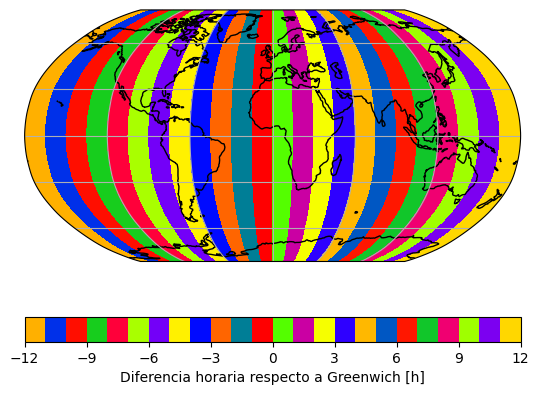

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

ax = plt.axes(projection=ccrs.Robinson())
ax.set_global()
ax.coastlines()
ax.gridlines()

lats = np.linspace(-90, 90, 10)
lons = np.linspace(-180, 180, 10)
LONS,LATS = np.meshgrid(lons,lats)
data = LONS/15

plt.contourf(LONS, LATS, data, transform=ccrs.PlateCarree(),levels=24,cmap='prism')
cbar = plt.colorbar(orientation='horizontal')
cbar.set_label('Diferencia horaria respecto a Greenwich [h]')

## Solución

Instalación de las librerías necesarias

In [64]:
!pip install -Uq cartopy
!pip install -q nrlmsise00
!pip install -qU 'nrlmsise00[dataset]'
!pip install -q spaceweather
!pip install -Uq mendeleev

Importación de las librerias 

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from nrlmsise00.dataset import msise_4d
from datetime import datetime
from mendeleev import element

Constantes

In [66]:
R = 8.31446261815324 # J/(mol K) Constante de los gases ideales

# Conversion de unidades
gr2kg = 1e-3 # gr a kg
gr_cm3_2_kg_m3 = 1e3 # gr/cm^3 a kg/m^3
m2km = 1e-3 # m a km

1. Obtener los datos de la atmósfera desde la superficie hasta 100 km en una ubicación, fecha y hora específica cada 50 metros.  Para ello puede usar el día y lugar de nacimiento. Asuma para la hora de nacimiento las 12 m (medio día). Para la ubicación use la ciudad del mundo que siempre ha soñado visitar o que más ha disfrutado visitar.

In [67]:
# Fecha de nacimiento a las 12:00 medio día
date = datetime(2002, 7, 26, 12, 0, 0)

# Altura máxima de la atmósfera a 100 km
h_max = 100e3 # m

# Alturas de 0 a h_max de 50 en 50 metros
zs = np.arange(0, h_max, 50) # m

# Coordenadas geográficas de Japon
lat = 35.68 # grados
lon = 139.76 # grados

# Obtenemos un objeto de nrmlmsise00 con los datos de la atmosfera en mi cumpleaños en Japon
ds = msise_4d(date, zs*m2km, [lat], [lon])

/home/andromedalactea/UniversityDevelops/Continuus_Mechanics/.venv/lib/python3.10/site-packages/spaceweather/celestrak.py:289: UserWarning: Local data files are older than 30days, pass `update=True` or run `sw.update_data()` manually if you need newer data.
  warn(
/home/andromedalactea/UniversityDevelops/Continuus_Mechanics/.venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2458: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  res = asanyarray(outputs, dtype=otypes[0])
/home/andromedalactea/UniversityDevelops/Continuus_Mechanics/.venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2458: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  res = asanyarray(outputs, dtype=otypes[0])
/home/andromedalactea/UniversityDevelops/Continuus_Mechanics/.venv/lib/python3.10/site-packages/numpy/li

2. Usando los datos de composición de la atmósfera, calcule la presión atmosférica a cada altura. Asuma para ello la ecuación de estado de gas ideal.  Haga gráficos de temperatura, densidad y presión con la altura, usando la convención en ciencias atmosféricas de poner la altura en el eje y.

Para esto tengamos en cuenta que la ecuación de estado del gas ideal esta dada por:

$$
\frac{p}{\rho} = \frac{RT}{M_\text{mol}}
$$

A partir de los datos que nos provee el modelo nrmlmsise00, podemos obtener el Mmol promedio, veamos:

In [68]:
# Definamos los elementos con mayor presencia en la atmósfera junto con su respectivo Mmol
species = [
    dict(name='N2',Mmol=2*element('Nitrogen').atomic_weight), # N2
    dict(name='O2',Mmol=2*element('Oxygen').atomic_weight), # O2
    dict(name='Ar',Mmol=1*element('Argon').atomic_weight), # Ar
    dict(name='N',Mmol=1*element('Nitrogen').atomic_weight), # N
    dict(name='O',Mmol=1*element('Oxygen').atomic_weight), # O
    dict(name='H',Mmol=1*element('Hydrogen').atomic_weight), # H
]

# Arrays para guardar la densidad y la masa de cada especie
ns = np.zeros(len(species))
ms = np.zeros(len(species))

# Extrae el Mmol de numero de particulas de cada especie por cm^3
for i, specie in enumerate(species):
  # Número de particulas por cm^3 de la especie
  ns[i] = np.array(ds[specie['name']]).flatten()[-1]
  
  # Mmol proporcionado por la abundancia de la especie
  ms[i] = specie['Mmol']*ns[i]

# Número total de Atomos o moleculas
n = ns.sum()

# Masa molar promedio
Mmol = ms.sum()/n

# Llevandolo al sistema internacional
Mmol = Mmol*gr2kg # kg/mol

In [69]:
# Obtiene los datos de densidad y temperatura empíricos
rhos_emp = np.array(ds["rho"]).flatten() # gr/cm^3
Ts_emp = np.array(ds["Talt"]).flatten() # K

# Lleva la densidad al sistema internacional
rhos_emp = rhos_emp*gr_cm3_2_kg_m3 # kg/m^3

# Usan la ecuación del gas ideal para obtener la presión empírica
Ps_emp = rhos_emp * R * Ts_emp / Mmol # Pa

Graficando la densidad, presión y temperartura con la altura

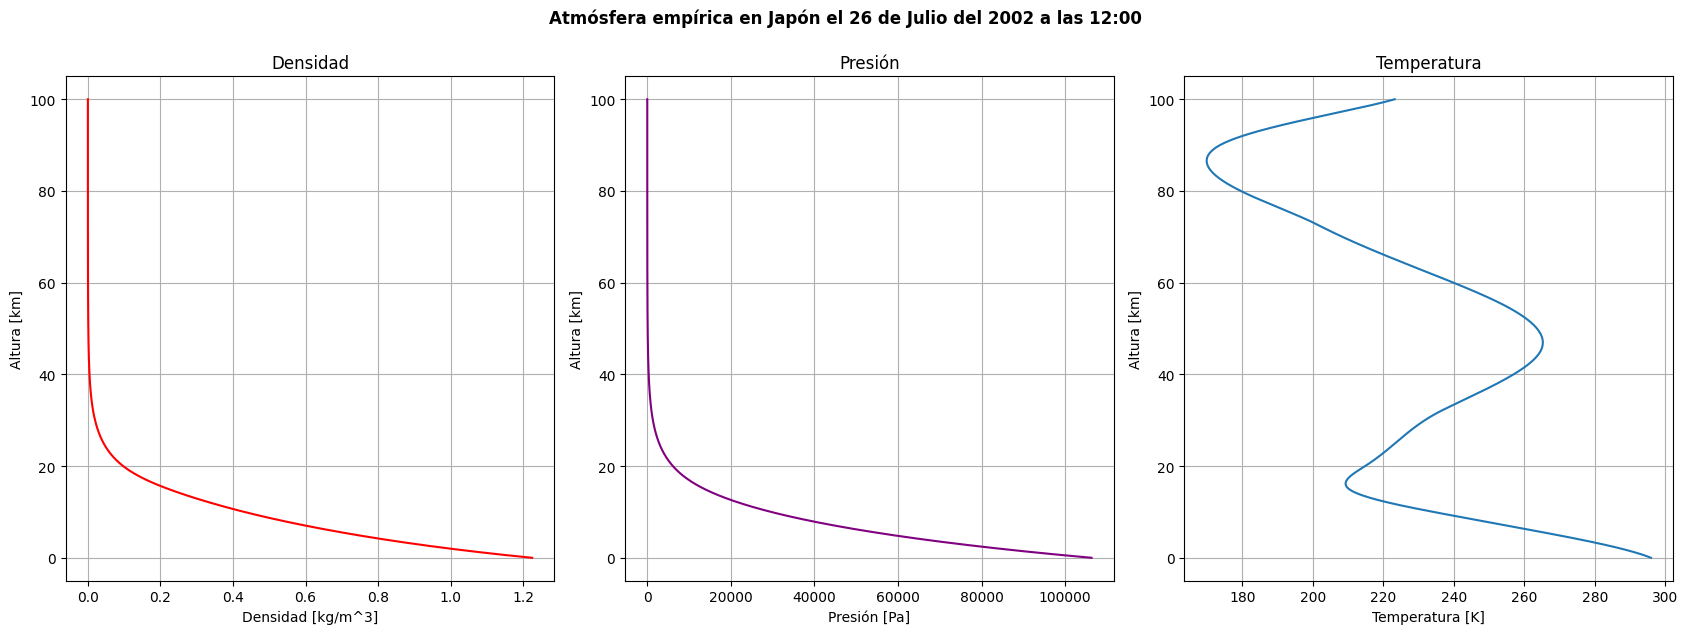

In [70]:
fig, axs = plt.subplots(1, 3, figsize=(17, 6))

# Densidad
axs[0].plot(rhos_emp, zs*m2km, color='r')
axs[0].set_title('Densidad')
axs[0].set_xlabel('Densidad [kg/m^3]')
axs[0].set_ylabel('Altura [km]')
axs[0].grid(True)

# Presión
axs[1].plot(Ps_emp, zs*m2km, color='purple')
axs[1].set_title('Presión')
axs[1].set_xlabel('Presión [Pa]')
axs[1].set_ylabel('Altura [km]')
axs[1].grid(True)

# Temperatura
axs[2].plot(Ts_emp, zs*m2km)
axs[2].set_title('Temperatura')
axs[2].set_xlabel('Temperatura [K]')
axs[2].set_ylabel('Altura [km]')
axs[2].grid(True)

# Ajusta el espacio entre los subplots
plt.tight_layout()

# Agregando un titulo global al gráfico
plt.suptitle(f'Atmósfera empírica en Japón el 26 de Julio del 2002 a las 12:00',
              y=1.05, fontweight='bold')
plt.show()

3. Llamamos tropopausa a la altura en la atmósfera en la que la temperatura deja de disminuir con la altura. Encuentre la altura de la **tropopausa** para el sitio y lugar elegido. A la capa de la atmósfera debajo de esa altura se la llama la **troposfera**.

Según el gráfico del punto anterior podemos darnos de cuenta que la troposfera esta cerca a los 20 km kilometros de altura, pero calculemos númericamente la altura de la troposfera en Japon en mi cumpleaños, para esto solo es necesario verificar el array que contiene los datos de nuestra temperatura con la altura, y ir haciendo un analisis de si cada elemento es menor que el anterior, sin embargo, se va a encontrar que hay un punto en el array donde esto no se cumple y es justo cuando la temperatura empezara a aumentar y es precisamente este punto del array que marca la troposfera, después solo basta con encontrar el indice de este elemento e ir a buscar a la lista de alturas a cual valor corresponde.

In [71]:
# Iteramos sobre cada temperatura para verificar si es mayor que la anterior
for i in range(1, len(Ts_emp)):
    if Ts_emp[i] > Ts_emp[i-1]:
        h_troposfera = zs[i]*m2km  
        print(f'La tropopausa esta aproximadamente a {h_troposfera:.2f} km de altura.')
        break

La tropopausa esta aproximadamente a 16.20 km de altura.


4. Haga un gráfico de contornos sobre un mapa (use el código de ejemplo mostrado al final del enunciado) en el que muestre la altura de la troposfera como función de la longitud y la latitud. Observe. Haga una animación mostrando la temperatura en la superficie de la Tierra a lo largo de 1 día.

Primero dado del procedimiento para el punto anterior, hagamos una función que permita dada una latitud y una longitud encontrar la tropopausa

In [ ]:
def tropopausa(latitud, longitud, date):
    """
    Función que calcula la altura de la tropopausa en base a la latitud,
    longitud y la fecha de estudio.

    Parameters:
        latitud : float latitud del lugar 
        longitud : float longitud del lugar

    Returns:
        h_troposfera : float altura de la tropopausa en km del lugar
    """
    # Obtenemos un objeto de nrmlmsise00 con los datos de la atmosfera en mi cumpleaños en Japon
    ds = msise_4d(date, zs*m2km, [latitud], [longitud])

    # Obtiene los datos de la temperatura empíricos
    Ts_emp = np.array(ds["Talt"]).flatten() # K

    # Iteramos sobre cada temperatura para verificar si es mayor que la anterior
    for i in range(1, len(Ts_emp)):
        if Ts_emp[i] > Ts_emp[i-1]:
            # Si se cumple la condición, se obtiene la altura de la tropopausa
            h_troposfera = zs[i]*m2km  

    return h_troposfera

Ahora encontremos la altura de la tropopausa 

In [ ]:
A

(array([[-180., -140., -100.,  -60.,  -20.,   20.,   60.,  100.,  140.,
          180.],
        [-180., -140., -100.,  -60.,  -20.,   20.,   60.,  100.,  140.,
          180.],
        [-180., -140., -100.,  -60.,  -20.,   20.,   60.,  100.,  140.,
          180.],
        [-180., -140., -100.,  -60.,  -20.,   20.,   60.,  100.,  140.,
          180.],
        [-180., -140., -100.,  -60.,  -20.,   20.,   60.,  100.,  140.,
          180.],
        [-180., -140., -100.,  -60.,  -20.,   20.,   60.,  100.,  140.,
          180.],
        [-180., -140., -100.,  -60.,  -20.,   20.,   60.,  100.,  140.,
          180.],
        [-180., -140., -100.,  -60.,  -20.,   20.,   60.,  100.,  140.,
          180.],
        [-180., -140., -100.,  -60.,  -20.,   20.,   60.,  100.,  140.,
          180.],
        [-180., -140., -100.,  -60.,  -20.,   20.,   60.,  100.,  140.,
          180.]]),
 array([[-90., -90., -90., -90., -90., -90., -90., -90., -90., -90.],
        [-70., -70., -70., -70., -70.,

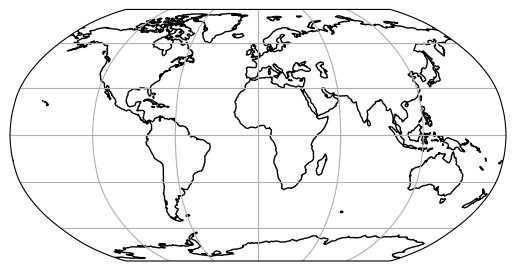

In [73]:
ax = plt.axes(projection=ccrs.Robinson())
ax.set_global()
ax.coastlines()
ax.gridlines()

lats = np.linspace(-90, 90, 10)
lons = np.linspace(-180, 180, 10)
LONS,LATS = np.meshgrid(lons,lats)
LONS,LATS

In [72]:
ax = plt.axes(projection=ccrs.Robinson())
ax.set_global()
ax.coastlines()
ax.gridlines()

lats = np.linspace(-90, 90, 10)
lons = np.linspace(-180, 180, 10)
LONS,LATS = np.meshgrid(lons,lats)
data = LONS/15

plt.contourf(LONS, LATS, data, transform=ccrs.PlateCarree(),levels=24,cmap='prism')
cbar = plt.colorbar(orientation='horizontal')
cbar.set_label('Diferencia horaria respecto a Greenwich [h]')

array([295.95895949, 295.79774413, 295.63361561, ..., 222.79312468,
       223.02765796, 223.25973585])